In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc
)

import pickle

In [2]:
# read csv file
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Shape of dataset: (299, 13)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: f

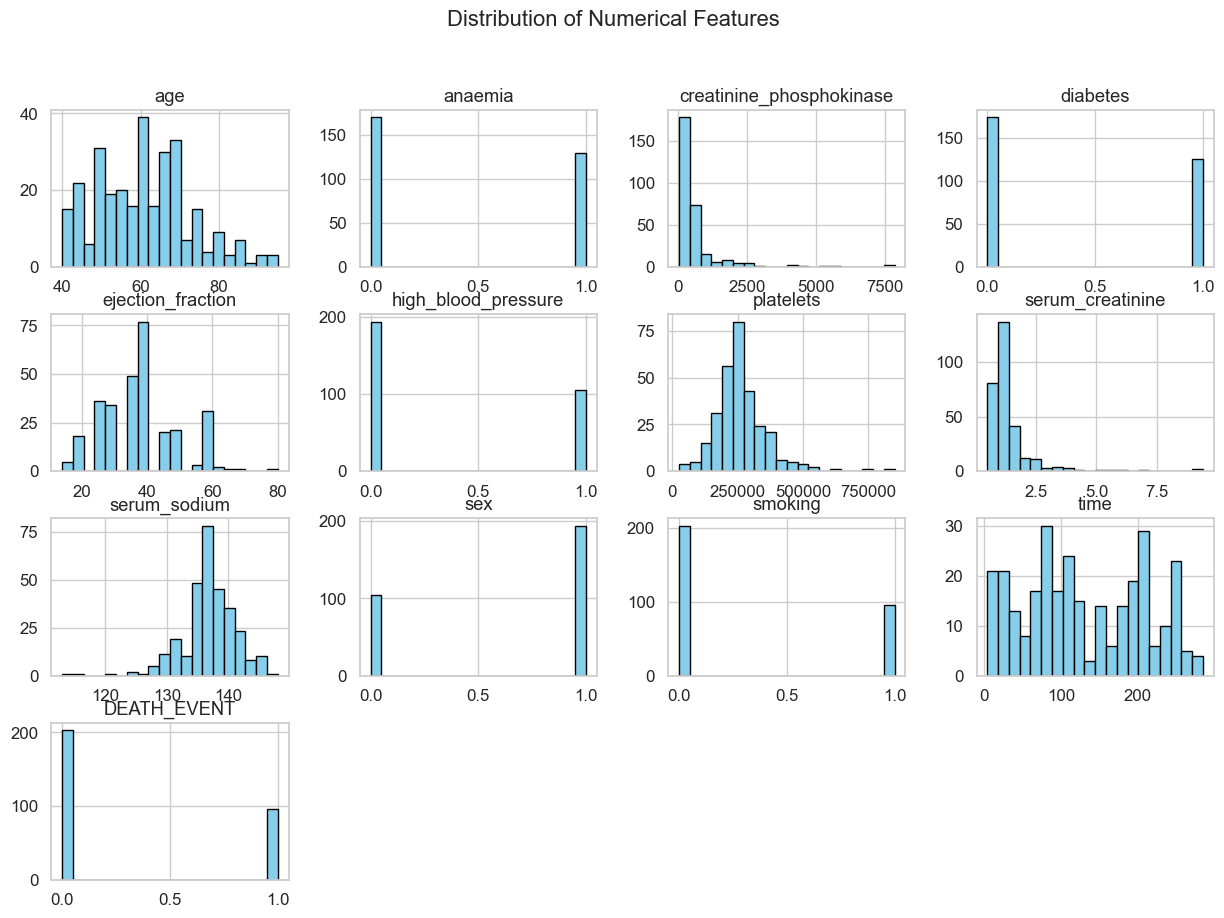

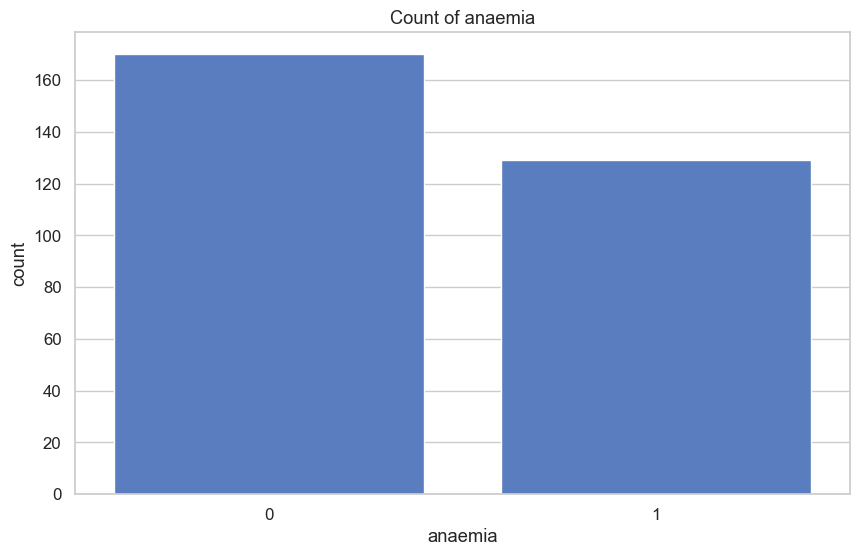

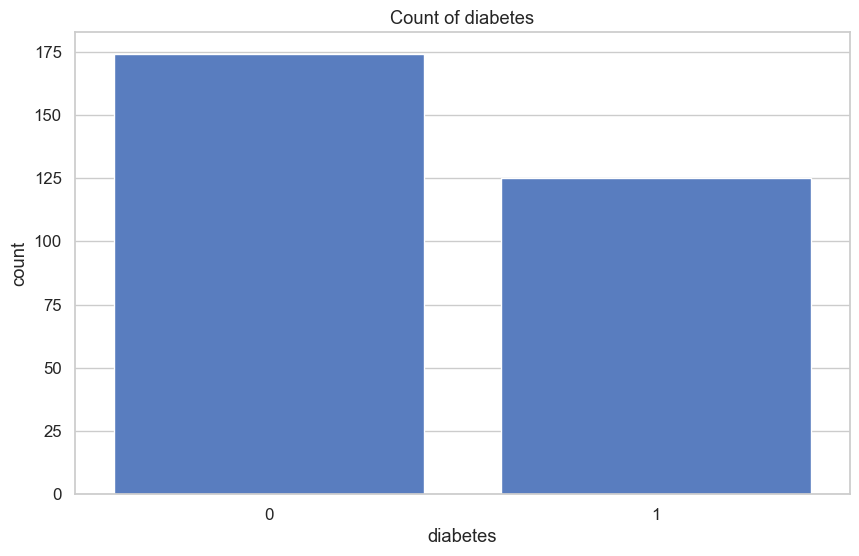

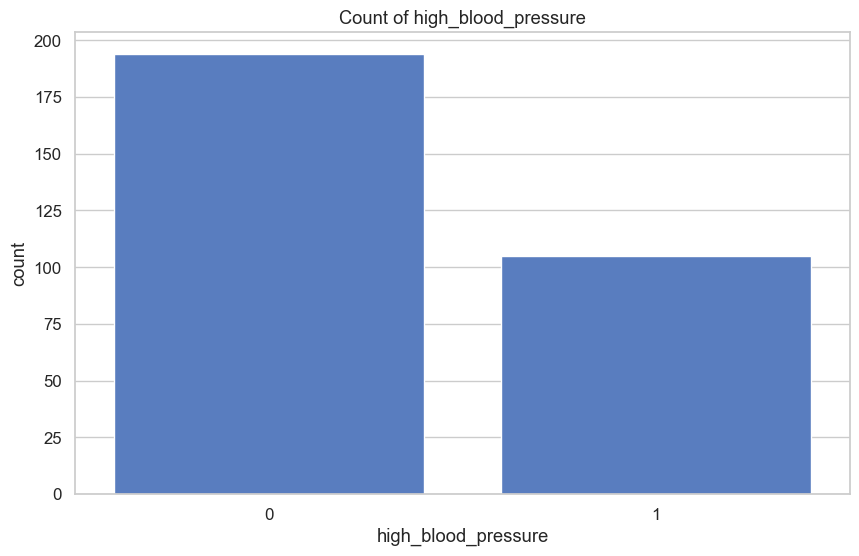

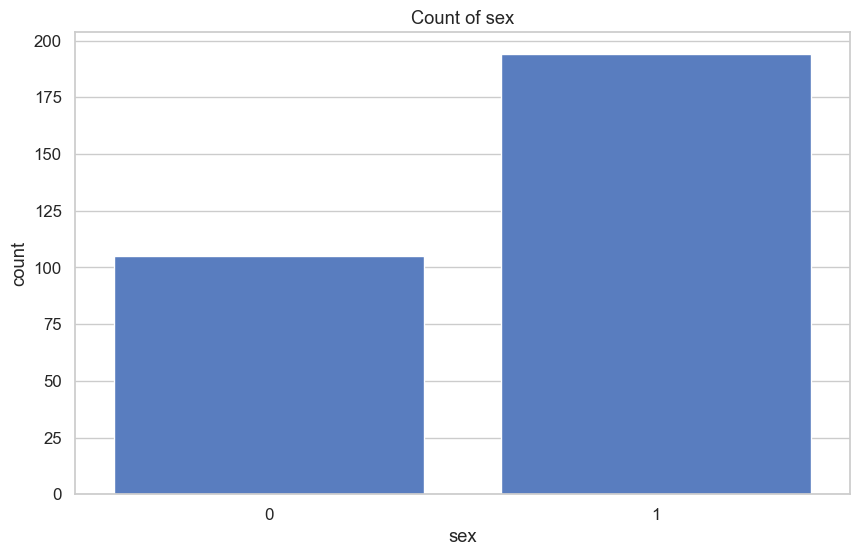

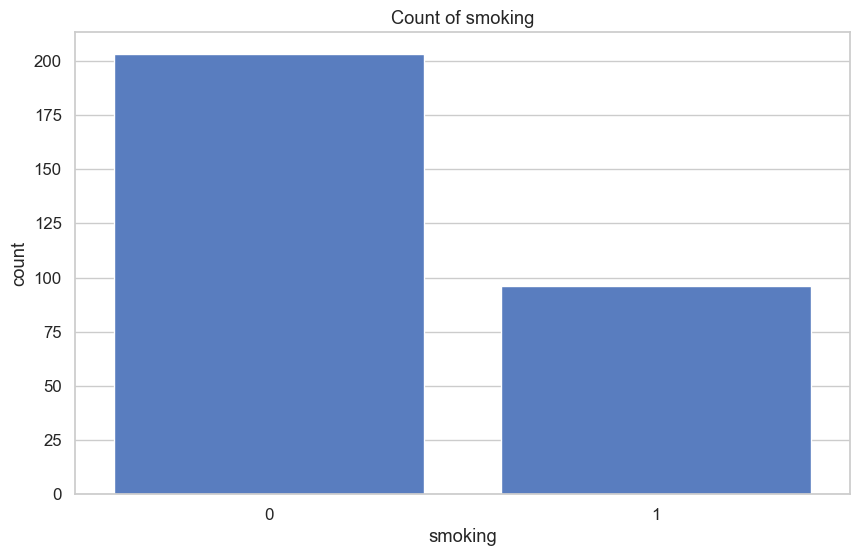

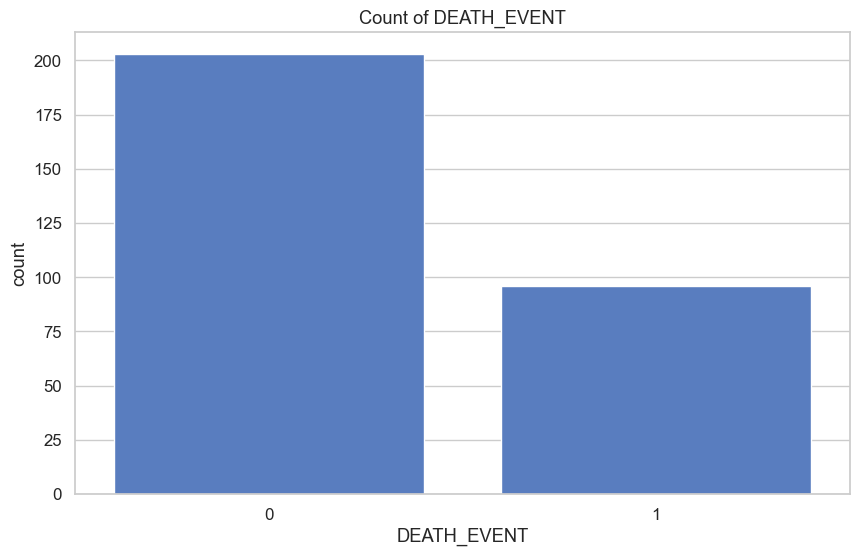

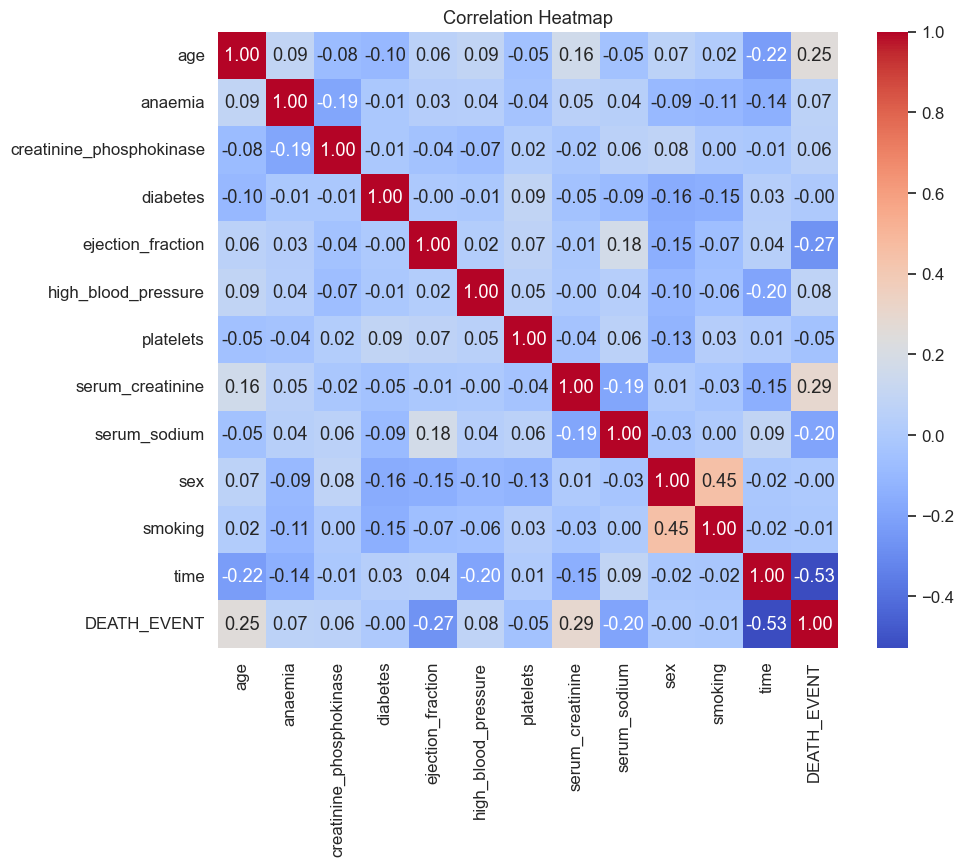

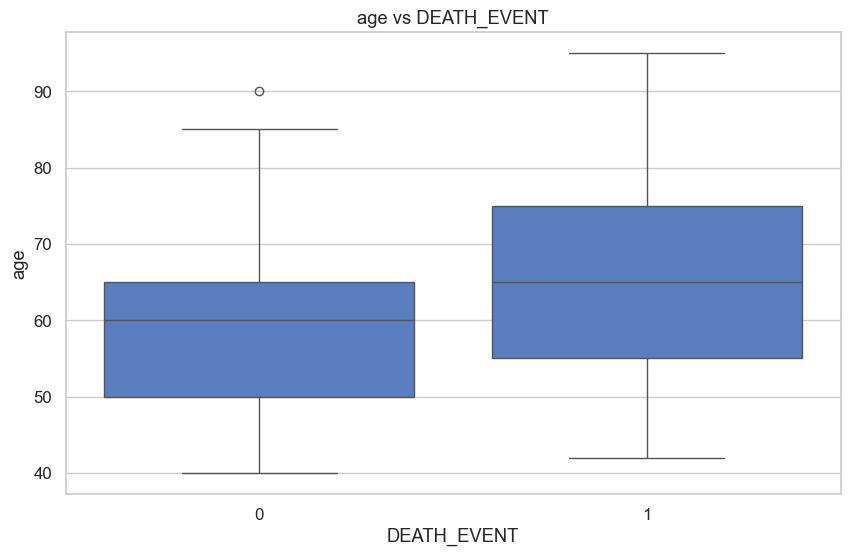

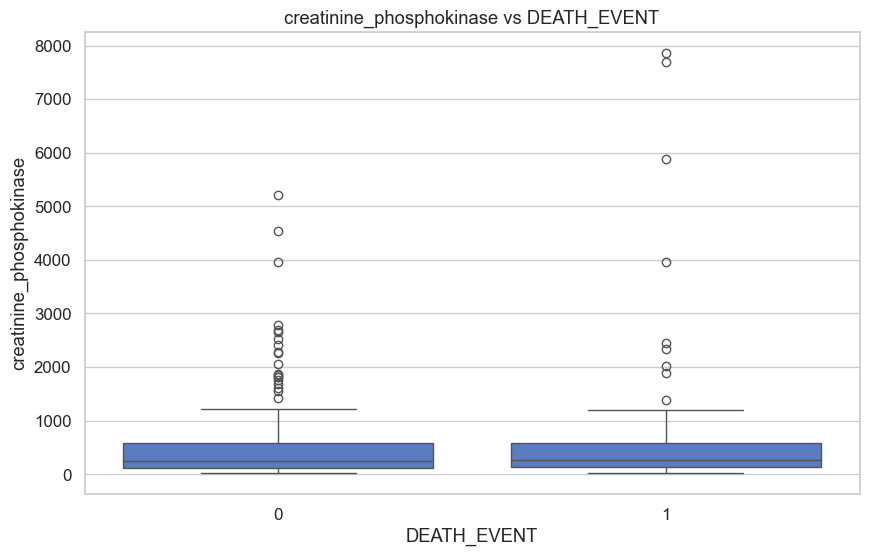

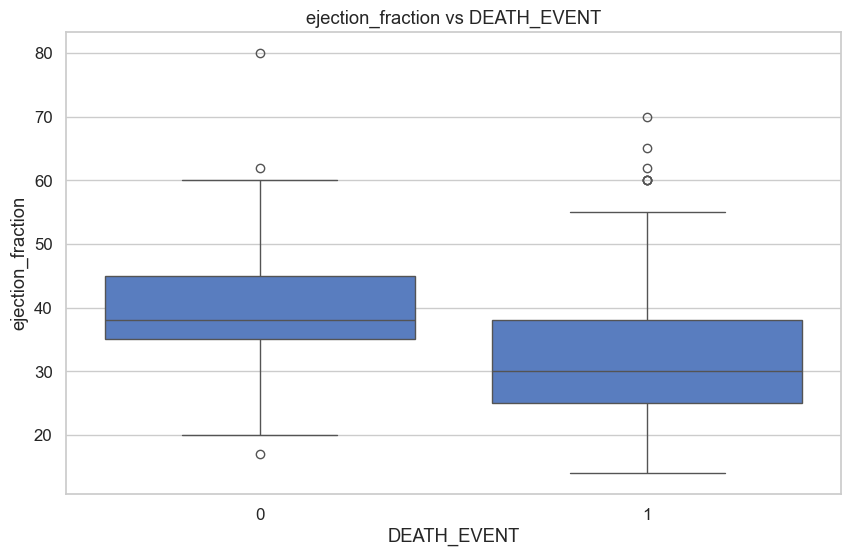

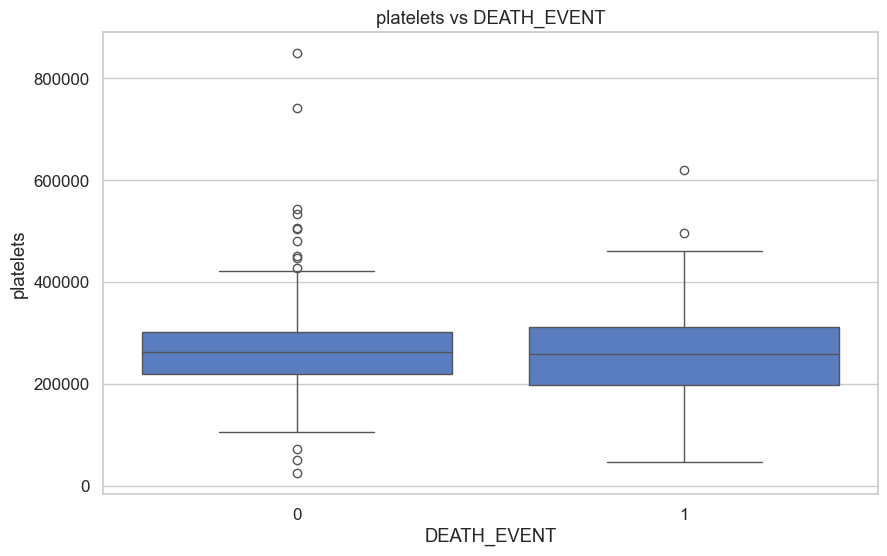

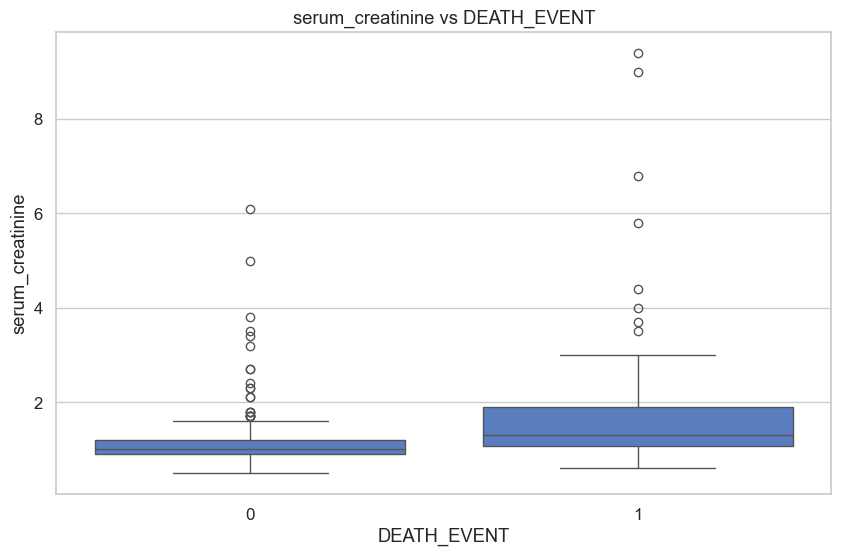

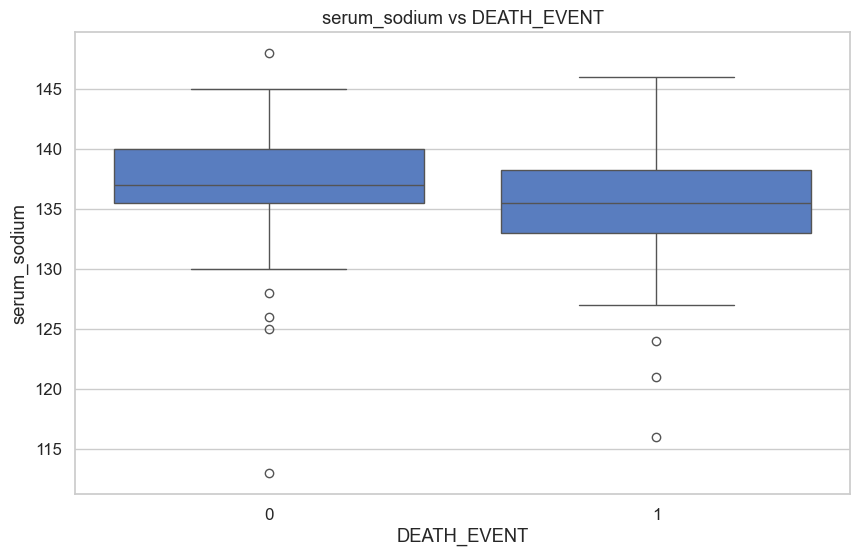

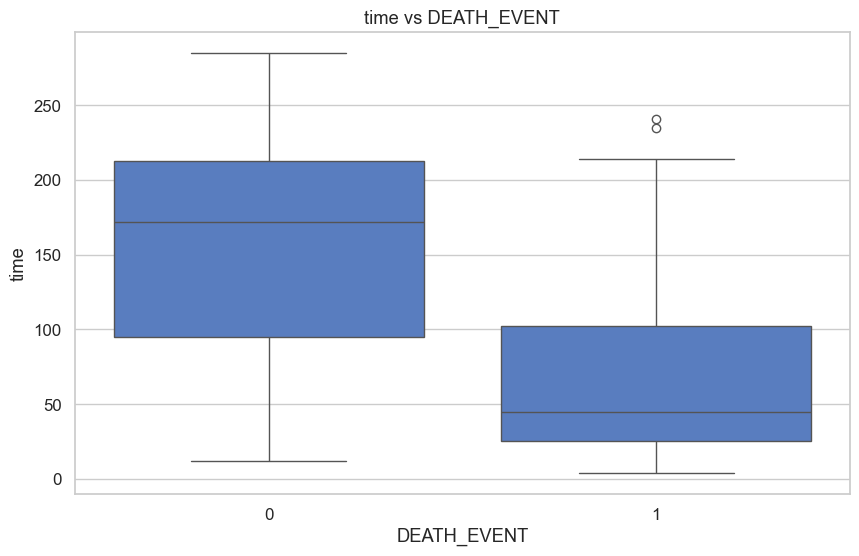

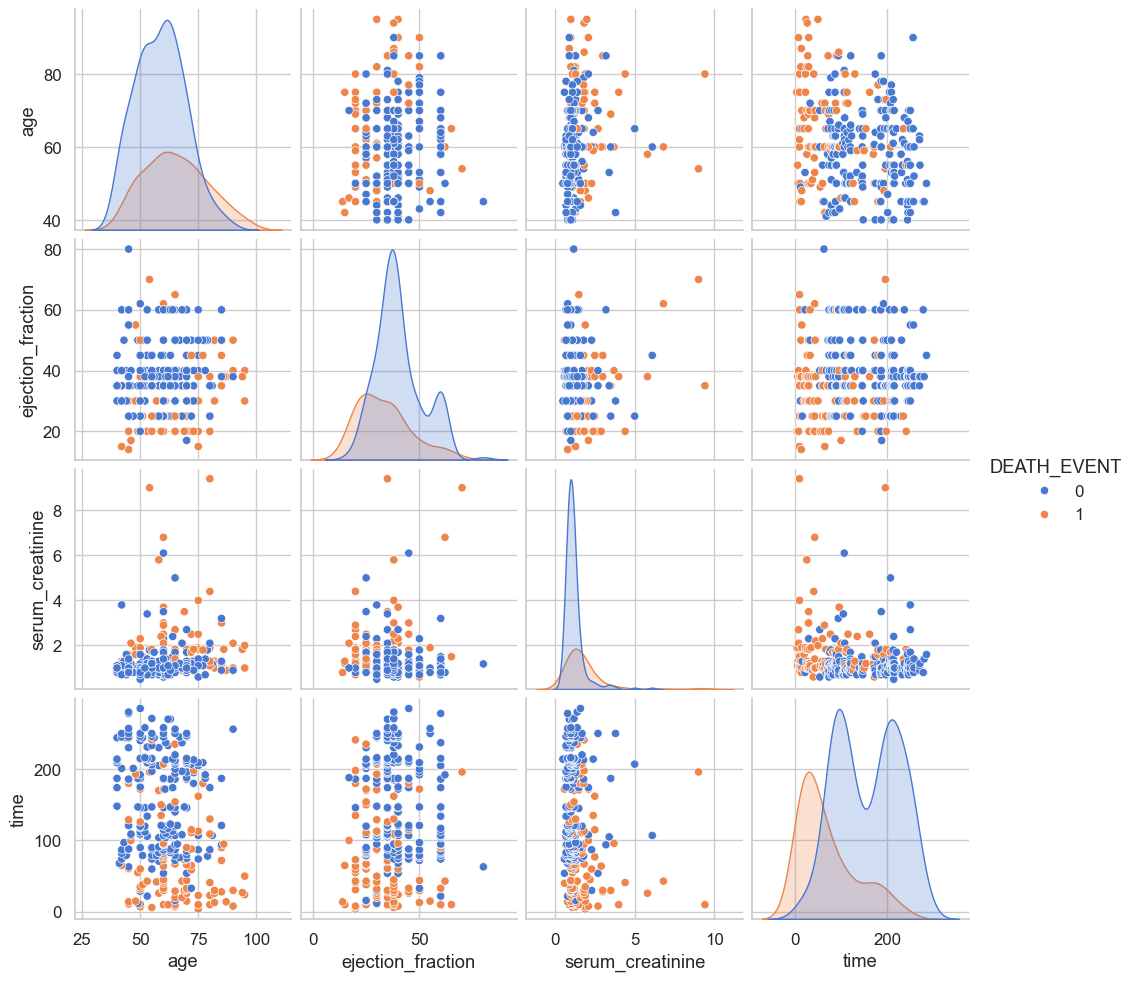

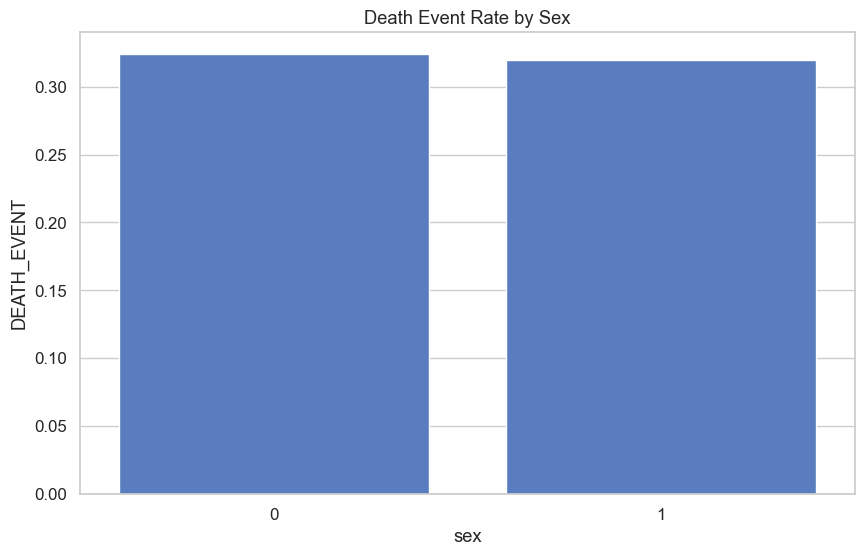

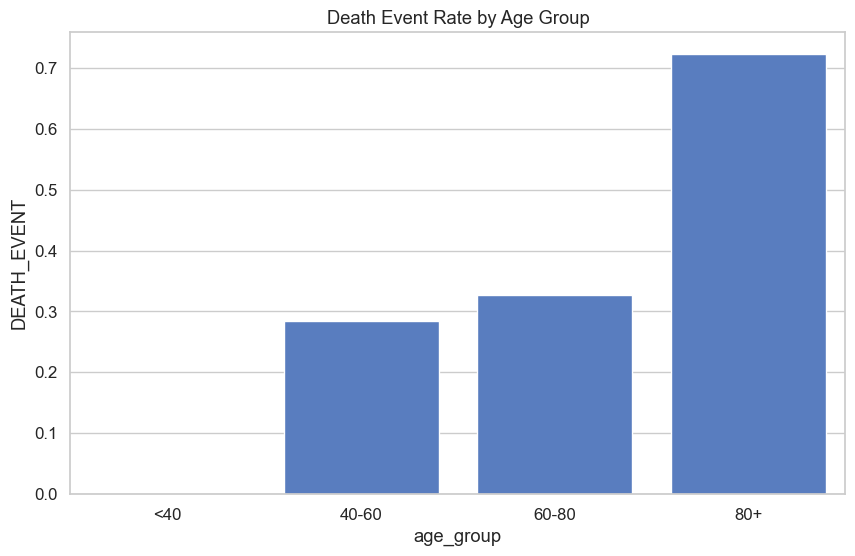

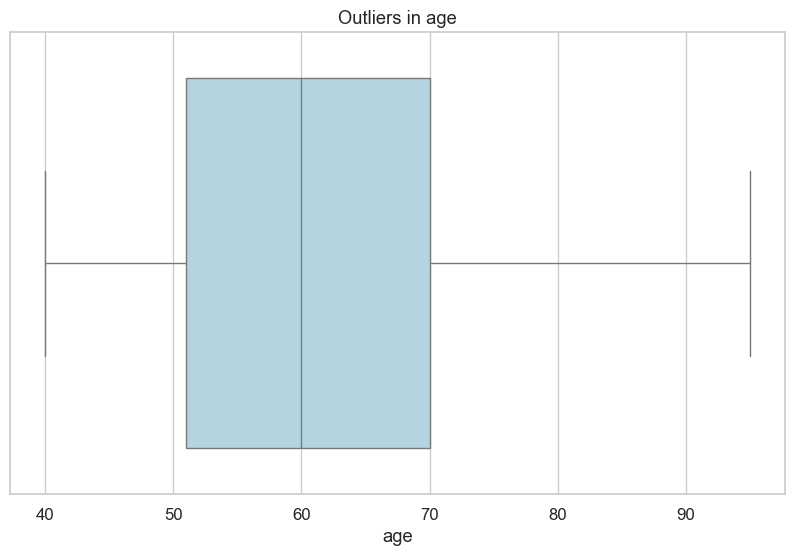

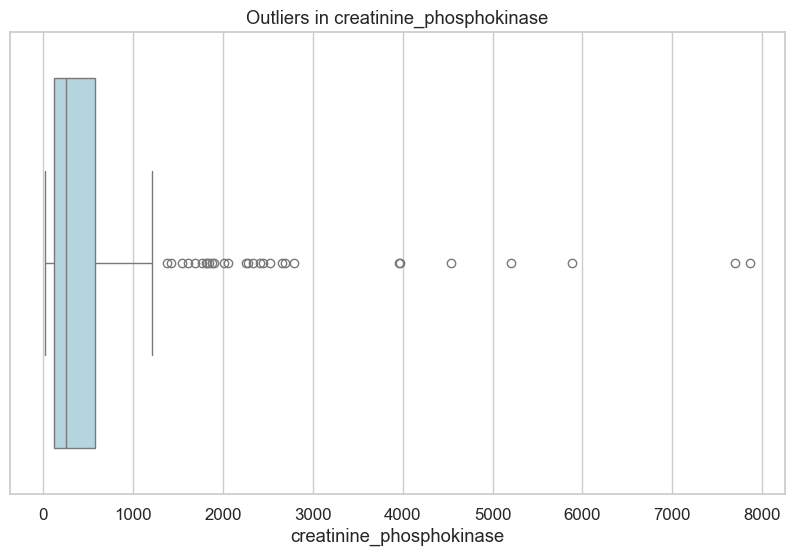

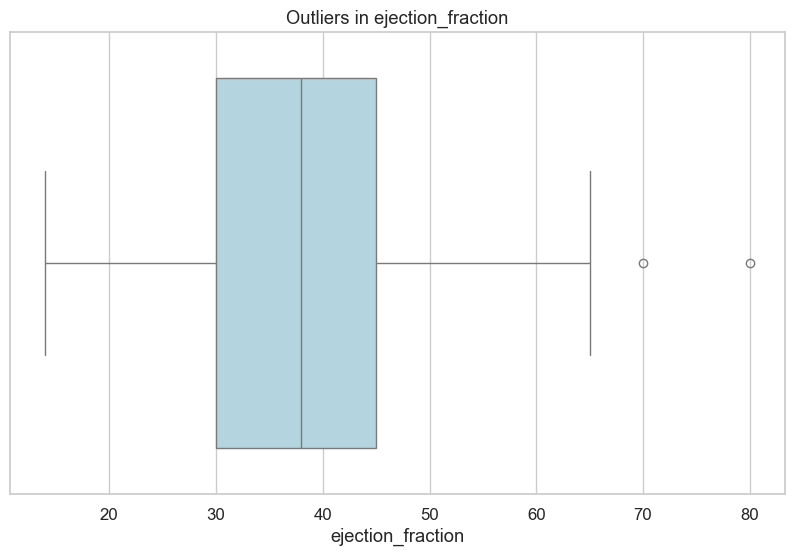

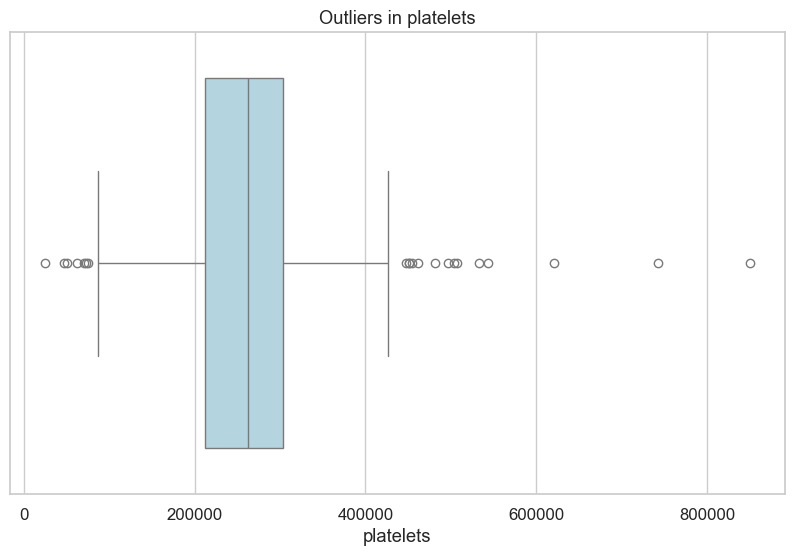

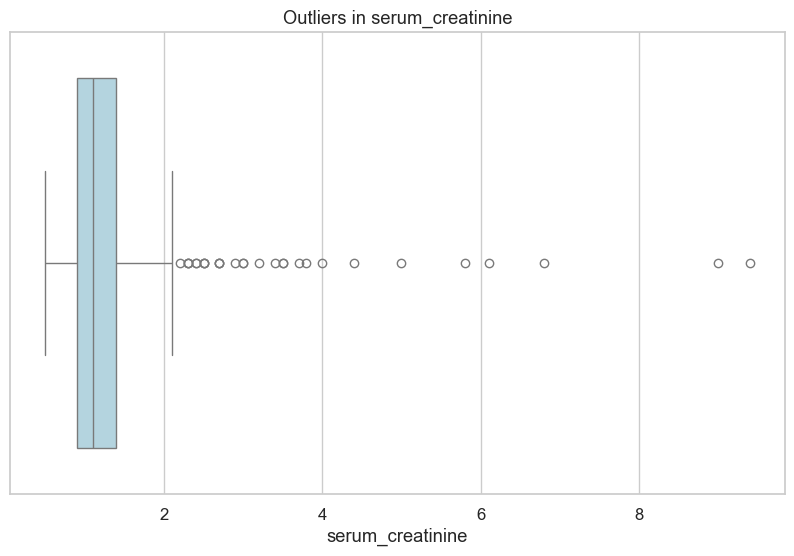

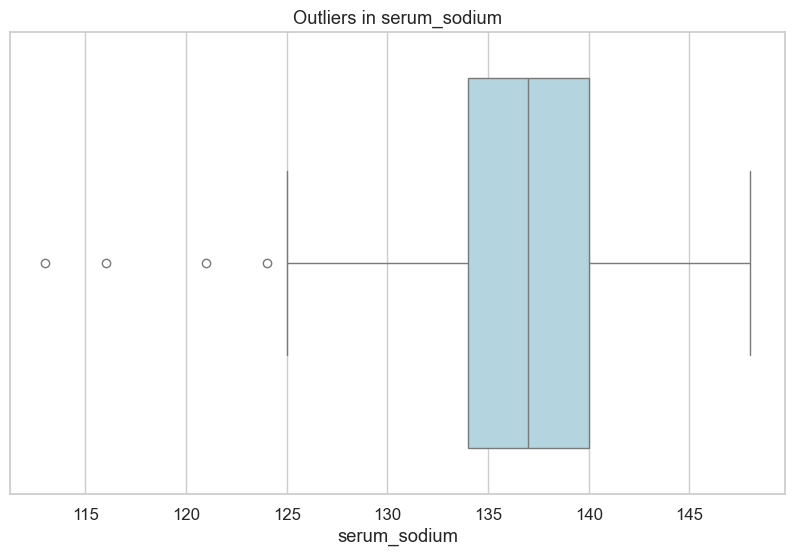

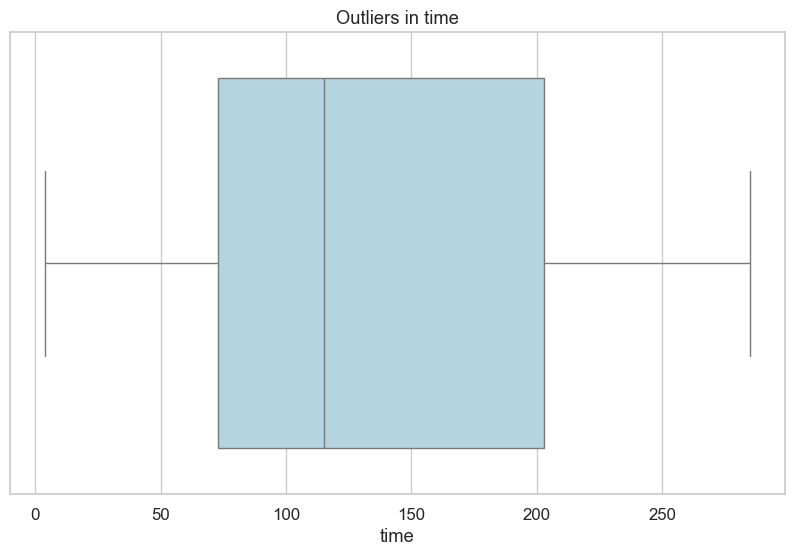


Correlation with DEATH_EVENT:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


In [4]:
# Set some style preferences
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# --- Basic Information ---
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# --- Univariate Analysis ---
# Histograms for numerical columns
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Count plots for binary/categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

# --- Bivariate Analysis ---
# Correlation matrix
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Relationship of features with DEATH_EVENT
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in numeric_features:
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title(f'{col} vs DEATH_EVENT')
    plt.show()

# --- Multivariate Analysis ---
# Pairplot of selected features
sns.pairplot(df[['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT', diag_kind='kde')
plt.show()

# --- Feature Relationships ---
# Example: Check survival by sex
sns.barplot(x='sex', y='DEATH_EVENT', data=df, errorbar=None)
plt.title('Death Event Rate by Sex')
plt.show()

# Example: Check survival by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])
sns.barplot(x='age_group', y='DEATH_EVENT', data=df, errorbar=None)
plt.title('Death Event Rate by Age Group')
plt.show()
df = df.drop(columns='age_group')

# --- Outlier Detection ---
for col in numeric_features:
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Outliers in {col}')
    plt.show()

# --- Summary Insights (print basic observations) ---
print("\nCorrelation with DEATH_EVENT:")
print(df.select_dtypes(include=['number']).corr()['DEATH_EVENT'].sort_values(ascending=False))

In [5]:
"""
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1
"""

seed = 1
d_test = 0.2
d_val = 0.2

# Separate features and target first
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

# Step 1: Split into train_val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=d_test, random_state=seed, stratify=y
)

# Step 2: Split train_val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=d_val, random_state=seed, stratify=y_train_val
)

print(f'Shape of full training set: {X_train_val.shape}')
print(f'Shape of validation set: {X_val.shape}')
print(f'Shape of test set: {X_test.shape}')

Shape of full training set: (239, 12)
Shape of validation set: (48, 12)
Shape of test set: (60, 12)


In [6]:
"""
ROC AUC could also be used to evaluate feature importance of numerical variables. Let's do that-
For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])
"""
# Select only numeric columns (no objects or categories)

df_train_numerical_col = X_train.select_dtypes(include="number")

max_auc = {'column': None, 'auc': -1}

for col in df_train_numerical_col.columns:
    fpr, tpr, thresholds = roc_curve(y_train, df_train_numerical_col[col])
    auc_value = auc(fpr, tpr)
    print(f'{col}: {auc_value:.4f}')

    # If AUC < 0.5, invert the column
    if auc_value < 0.5:
        print(f"    ↳ Inverting {col} (AUC < 0.5)")
        df_train_numerical_col[col] = -df_train_numerical_col[col]
        auc_value = 1 - auc_value  # inverted AUC improves to >0.5

    # Track the best feature by AUC
    if auc_value > max_auc['auc']:
        max_auc['column'] = col
        max_auc['auc'] = auc_value

print("\nBest column by AUC:")
print(max_auc)

age: 0.6509
anaemia: 0.5162
creatinine_phosphokinase: 0.5406
diabetes: 0.4801
    ↳ Inverting diabetes (AUC < 0.5)
ejection_fraction: 0.2901
    ↳ Inverting ejection_fraction (AUC < 0.5)
high_blood_pressure: 0.5311
platelets: 0.4977
    ↳ Inverting platelets (AUC < 0.5)
serum_creatinine: 0.7803
serum_sodium: 0.3582
    ↳ Inverting serum_sodium (AUC < 0.5)
sex: 0.4967
    ↳ Inverting sex (AUC < 0.5)
smoking: 0.5101
time: 0.1734
    ↳ Inverting time (AUC < 0.5)

Best column by AUC:
{'column': 'time', 'auc': np.float64(0.8266441610402601)}


In [7]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "model__C": [0.01, 0.1, 1, 10],
            "model__solver": ["lbfgs", "liblinear"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "model__max_depth": [3, 5, 7, None],
            "model__min_samples_split": [2, 5, 10],
            "model__criterion": ["gini", "entropy"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [5, 10, None],
            "model__min_samples_split": [2, 5, 10]
        }
    }
}

# ==========================
# Train, Tune & Evaluate
# ==========================
results = []

for name, mp in models.items():
    print(f"\n Training {name}...")
    # Create pipeline (scaler for LR, others unaffected)
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", mp["model"])
    ])
    
    grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="roc_auc", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": acc,
        "ROC_AUC": auc,
        "F1_Score": f1
    })
    
    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.3f}, ROC-AUC: {auc:.3f}, F1: {f1:.3f}")

# ==========================
# 5. Compare Models
# ==========================
results_df = pd.DataFrame(results).sort_values(by="ROC_AUC", ascending=False)
print("\n Model Comparison:")
print(results_df)

best_model_name = results_df.iloc[0]["Model"]
print(f"\n Best Model: {best_model_name}")


 Training Logistic Regression...
Best Params: {'model__C': 0.1, 'model__solver': 'liblinear'}
Accuracy: 0.850, ROC-AUC: 0.908, F1: 0.743

 Training Decision Tree...
Best Params: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_split': 10}
Accuracy: 0.867, ROC-AUC: 0.865, F1: 0.778

 Training Random Forest...
Best Params: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Accuracy: 0.867, ROC-AUC: 0.909, F1: 0.778

 Model Comparison:
                 Model                                        Best Params  \
2        Random Forest  {'model__max_depth': 5, 'model__min_samples_sp...   
0  Logistic Regression    {'model__C': 0.1, 'model__solver': 'liblinear'}   
1        Decision Tree  {'model__criterion': 'entropy', 'model__max_de...   

   Accuracy   ROC_AUC  F1_Score  
2  0.866667  0.908858  0.777778  
0  0.850000  0.907574  0.742857  
1  0.866667  0.865212  0.777778  

 Best Model: Random Forest


In [8]:
# Example patient data
sample = pd.DataFrame([{
    'age': 65,
    'anaemia': 0,
    'creatinine_phosphokinase': 250,
    'diabetes': 1,
    'ejection_fraction': 35,
    'high_blood_pressure': 1,
    'platelets': 250000,
    'serum_creatinine': 1.9,
    'serum_sodium': 130,
    'sex': 1,
    'smoking': 0,
    'time': 120
}])

# Predict class (0 = survived, 1 = death)
pred_class = best_model.predict(sample)[0]

# Predict probability of death
pred_proba = best_model.predict_proba(sample)[0][1]

print(f"Predicted Class: {pred_class}")
print(f"Probability of Death: {pred_proba:.2f}")

Predicted Class: 0
Probability of Death: 0.42


In [9]:
# Save model to file
with open("heart_failure_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as heart_failure_model.pkl")

Model saved as heart_failure_model.pkl


In [11]:
!jupyter nbconvert --to python Mid_Term_Project.ipynb

[NbConvertApp] Converting notebook Mid_Term_Project.ipynb to python
[NbConvertApp] Writing 8054 bytes to Mid_Term_Project.py
